# Inteligencia de Negocios: Laboratorio 1
## Integrantes: Grupo 17

* Mariana Díaz Arenas - [m.diaza2](mailto:m.diaza2@uniandes.edu.co) 
* Esteban Gonzales Ruales - [e.gonzalez5](mailto:e.gonzalez5@uniandes.edu.co) 
* Juan Diego Yepes - [j.yepes](mailto:j.yepes@uniandes.edu.co) 


En el siguiente cuaderno de Jupyter implementamos la solución al siguiente laboratorio propuesto: [link](https://gitlab.virtual.uniandes.edu.co/ISIS3301/laboratorios/blob/master/202310/Lab%201%20-%20Clustering/Laboratorio1_enunciado.md)

# 1. Entendimiento de los datos

In [207]:
# Importación de librerías y creación del dataFrame

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [208]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

df_roads = pd.read_csv("data/BiciAlpes.csv", index_col=False, encoding="latin1", sep=";")
df_roads = df_roads.iloc[:, :-1]

# Imprime el tamaño del dataframe
df_roads.shape

(5338, 14)

In [209]:
# Verificación de que se cargaron los datos correctamente
df_roads

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity
0,Mañana,1,Día laboral,6,30.0,1,1,1,1,bike,1,3,1,3
1,Mañana,1,Día laboral,6,30.0,1,1,1,1,bike,1,0,1,3
2,Tarde,1,Fin de semana,6,30.0,1,1,1,1,bike,1,3,1,3
3,Tarde,2,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,2
4,Mañana,2,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5333,Tarde,1,Día laboral,6,20.0,1,1,2,1,bike,1,9,1,3
5334,Noche,2,Día laboral,6,30.0,1,1,1,2,bike,2,0,1,2
5335,Tarde,1,Día laboral,6,30.0,4,5,2,1,bike,2,3,1,2
5336,Noche,1,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,3


In [210]:
# Verificacion de Completitud
(df_roads.isnull().sum() / df_roads.shape[0]).sort_values(ascending = False)

Day_of_Week                                    0.003559
Time                                           0.000000
Number_of_Casualties                           0.000000
Road_Type                                      0.000000
Speed_limit                                    0.000000
Light_Conditions                               0.000000
Weather_Conditions                             0.000000
Road_Surface_Conditions                        0.000000
Urban_or_Rural_Area                            0.000000
Vehicle_Type                                   0.000000
Did_Police_Officer_Attend_Scene_of_Accident    0.000000
Junction_Detail                                0.000000
Number_of_Vehicles                             0.000000
Accident_Severity                              0.000000
dtype: float64

In [211]:
# # Verificacion de Unicidad
df_roads.loc[df_roads.duplicated(subset = df_roads.columns[1:], keep = False)].sort_values(by = "Time")

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity
87,Madrugada,1,Día laboral,6,30.0,4,1,1,1,bike,1,0,1,3
36,Madrugada,1,NaN,6,30.0,4,1,1,1,bike,1,0,1,3
189,Madrugada,1,Fin de semana,6,30.0,4,1,1,1,bike,1,3,1,3
514,Madrugada,1,Día laboral,6,30.0,1,1,1,1,bike,1,9,1,3
3412,Mañana,1,Día laboral,6,30.0,1,1,1,2,bike,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602,Tarde,2,Día laboral,6,30.0,1,1,1,1,bike,1,3,1,3
2638,Tarde,2,Día laboral,6,30.0,4,1,1,1,bike,1,0,1,2
1312,Tarde,1,Fin de semana,6,30.0,1,1,1,1,bike,2,3,1,3
1291,Tarde,1,Día laboral,6,30.0,1,1,2,1,bike,1,3,1,2


In [212]:
# Número de resgistros duplicados
# Tiene sentido tener todos estos valores repetidos? -> si porque podemos tener varios registros de la misma ruta pero en diferentes fechas
print('Total de registros repetidos:', df_roads.loc[df_roads.duplicated(subset = df_roads.columns, keep = False)].shape[0])

Total de registros repetidos: 3834


In [213]:
# Consistencia
#Revisar todos los features
df_roads.groupby(['Time', 'Day_of_Week']).size()

Time       Day_of_Week  
Madrugada  Día laboral         3
           Fin de semana       1
Mañana     Día laboral      1249
           Fin de semana     429
Noche      Día laboral      1041
           Fin de semana     428
Tarde      Día laboral      1539
           Fin de semana     629
dtype: int64

Ahora se va a revisar que los datos esten dentro de los rangos establecidos por el diccionario de datos


In [214]:
# Revision de Road Type
print(all(map(lambda x: x in [1, 2, 3, 6, 7, 9], df_roads["Road_Type"])))

True


In [215]:
# Revision de Accident Severity
print(all(map(lambda x: x in [1, 2, 3], df_roads["Accident_Severity"])))

True


In [216]:
# Revision de Number of Vehichles
print(all(map(lambda x: x >= 0, df_roads["Number_of_Vehicles"])))

True


In [217]:
# Revision de Speed Limit
print(all(map(lambda x: x >= 0, df_roads["Speed_limit"])))

True


In [218]:
# Revision de Junction Detail
print(all(map(lambda x: x in [-1, 0, 1, 2, 3, 5, 6, 7, 8, 9], df_roads["Junction_Detail"])))

True


In [219]:
# Revision de Number of Casualties
print(all(map(lambda x: x >= 0, df_roads["Number_of_Casualties"])))

True


In [220]:
# Revision de Light Conditions
print(all(map(lambda x: x in [-1, 1, 4, 5, 6, 7], df_roads["Light_Conditions"])))

True


In [221]:
# Revision de Weather Conditions
print(all(map(lambda x: x in [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9], df_roads["Weather_Conditions"])))

True


In [222]:
# Revision de Road Surface Conditions
print(all(map(lambda x: x in [-1, 1, 2, 3, 4, 5, 6, 7], df_roads["Road_Surface_Conditions"])))

True


In [223]:
# Revision de Urban or Rural Area
print(all(map(lambda x: x in [1, 2, 3], df_roads["Urban_or_Rural_Area"])))

True


In [224]:
# Revision de Did Police Officer Attend Scene of Accident
print(all(map(lambda x: x in [1, 2, 3], df_roads["Did_Police_Officer_Attend_Scene_of_Accident"])))
# Como se ve que existen elementos que no cumplen con las reglas de el diccionario se procede a buscar cuantos elementos no cumplen

False


In [225]:
# Encontramos que hay dos datos que no cumplen con las condiciones que se especifican en el diccionario de datos, estos datos seran removidos despues
print(len(list(filter(lambda x: x not in [1, 2, 3], df_roads["Did_Police_Officer_Attend_Scene_of_Accident"]))))

2


In [226]:
# Reemplazamos los valores no numéricos por valores numéricos para hacer el clustering
df_roads['Time'].replace({'Mañana': 1, 'Tarde': 2, 'Noche': 3, 'Madrugada': 4}, inplace = True)
df_roads['Day_of_Week'].replace({'Día laboral': 1, 'Fin de semana': 2}, inplace = True)

In [227]:
# Descripcion de los sets de datos
features = ['Time', 'Number_of_Casualties', 'Day_of_Week', 'Road_Type','Speed_limit', 'Light_Conditions', 'Weather_Conditions','Road_Surface_Conditions', 'Urban_or_Rural_Area','Did_Police_Officer_Attend_Scene_of_Accident', 'Junction_Detail','Number_of_Vehicles', 'Accident_Severity']
for feature in features:
    mean = df_roads[feature].mean()
    median = df_roads[feature].median()
    var = df_roads[feature].var()
    std = df_roads[feature].std(ddof=0)
    sout = f"Para el feature {feature}: La media es {mean}, la mediana es {median}, la varianza es {var} y la desviación estándar es {std}."
    print(sout)

Para el feature Time: La media es 1.9634694642188086, la mediana es 2.0, la varianza es 0.5954424855766662 y la desviación estándar es 0.7715769162662913.
Para el feature Number_of_Casualties: La media es 1.1180217309853877, la mediana es 1.0, la varianza es 0.10935849905924783 y la desviación estándar es 0.33066298895796875.
Para el feature Day_of_Week: La media es 1.2795638277871781, la mediana es 1.0, la varianza es 0.20144576684476617 y la desviación estándar es 0.44878490836943163.
Para el feature Road_Type: La media es 5.587485949793931, la mediana es 6.0, la varianza es 2.006678669935588 y la desviación estándar es 1.4164401669741924.
Para el feature Speed_limit: La media es 33.52285500187336, la mediana es 30.0, la varianza es 104.1742011785219 y la desviación estándar es 10.205620294325044.
Para el feature Light_Conditions: La media es 1.7128137879355565, la mediana es 1.0, la varianza es 2.121181101162677 y la desviación estándar es 1.4562910860841813.
Para el feature Weather

# 2. Preparacion de los Datos

In [228]:
# Quitamos las columnas que no necesitamos
df_roads = df_roads.drop(["Vehicle_Type"], axis=1)

In [229]:
# Se quitan las filas que tienen valores que no cumplen con las especificaciones del diccionario
df_roads = df_roads.drop(df_roads[df_roads["Did_Police_Officer_Attend_Scene_of_Accident"] == -1].index)

In [230]:
# Se revisar que los datos que valores invalidos se hayan eliminado exitosamente
print(len(list(filter(lambda x: x not in [1, 2, 3], df_roads["Did_Police_Officer_Attend_Scene_of_Accident"]))))

0


In [231]:
# Quitamos las columnas nulas
df_roads = df_roads.dropna(subset=["Day_of_Week"])

In [232]:
(df_roads.isnull().sum() / df_roads.shape[0]).sort_values(ascending = False)

Time                                           0.0
Number_of_Casualties                           0.0
Day_of_Week                                    0.0
Road_Type                                      0.0
Speed_limit                                    0.0
Light_Conditions                               0.0
Weather_Conditions                             0.0
Road_Surface_Conditions                        0.0
Urban_or_Rural_Area                            0.0
Did_Police_Officer_Attend_Scene_of_Accident    0.0
Junction_Detail                                0.0
Number_of_Vehicles                             0.0
Accident_Severity                              0.0
dtype: float64

In [233]:
df_roads

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity
0,1,1,1.0,6,30.0,1,1,1,1,1,3,1,3
1,1,1,1.0,6,30.0,1,1,1,1,1,0,1,3
2,2,1,2.0,6,30.0,1,1,1,1,1,3,1,3
3,2,2,1.0,6,30.0,1,1,1,1,1,6,1,2
4,1,2,1.0,6,30.0,1,1,1,1,1,6,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5333,2,1,1.0,6,20.0,1,1,2,1,1,9,1,3
5334,3,2,1.0,6,30.0,1,1,1,2,2,0,1,2
5335,2,1,1.0,6,30.0,4,5,2,1,2,3,1,2
5336,3,1,1.0,6,30.0,1,1,1,1,1,6,1,3


# 3. Modelamiento

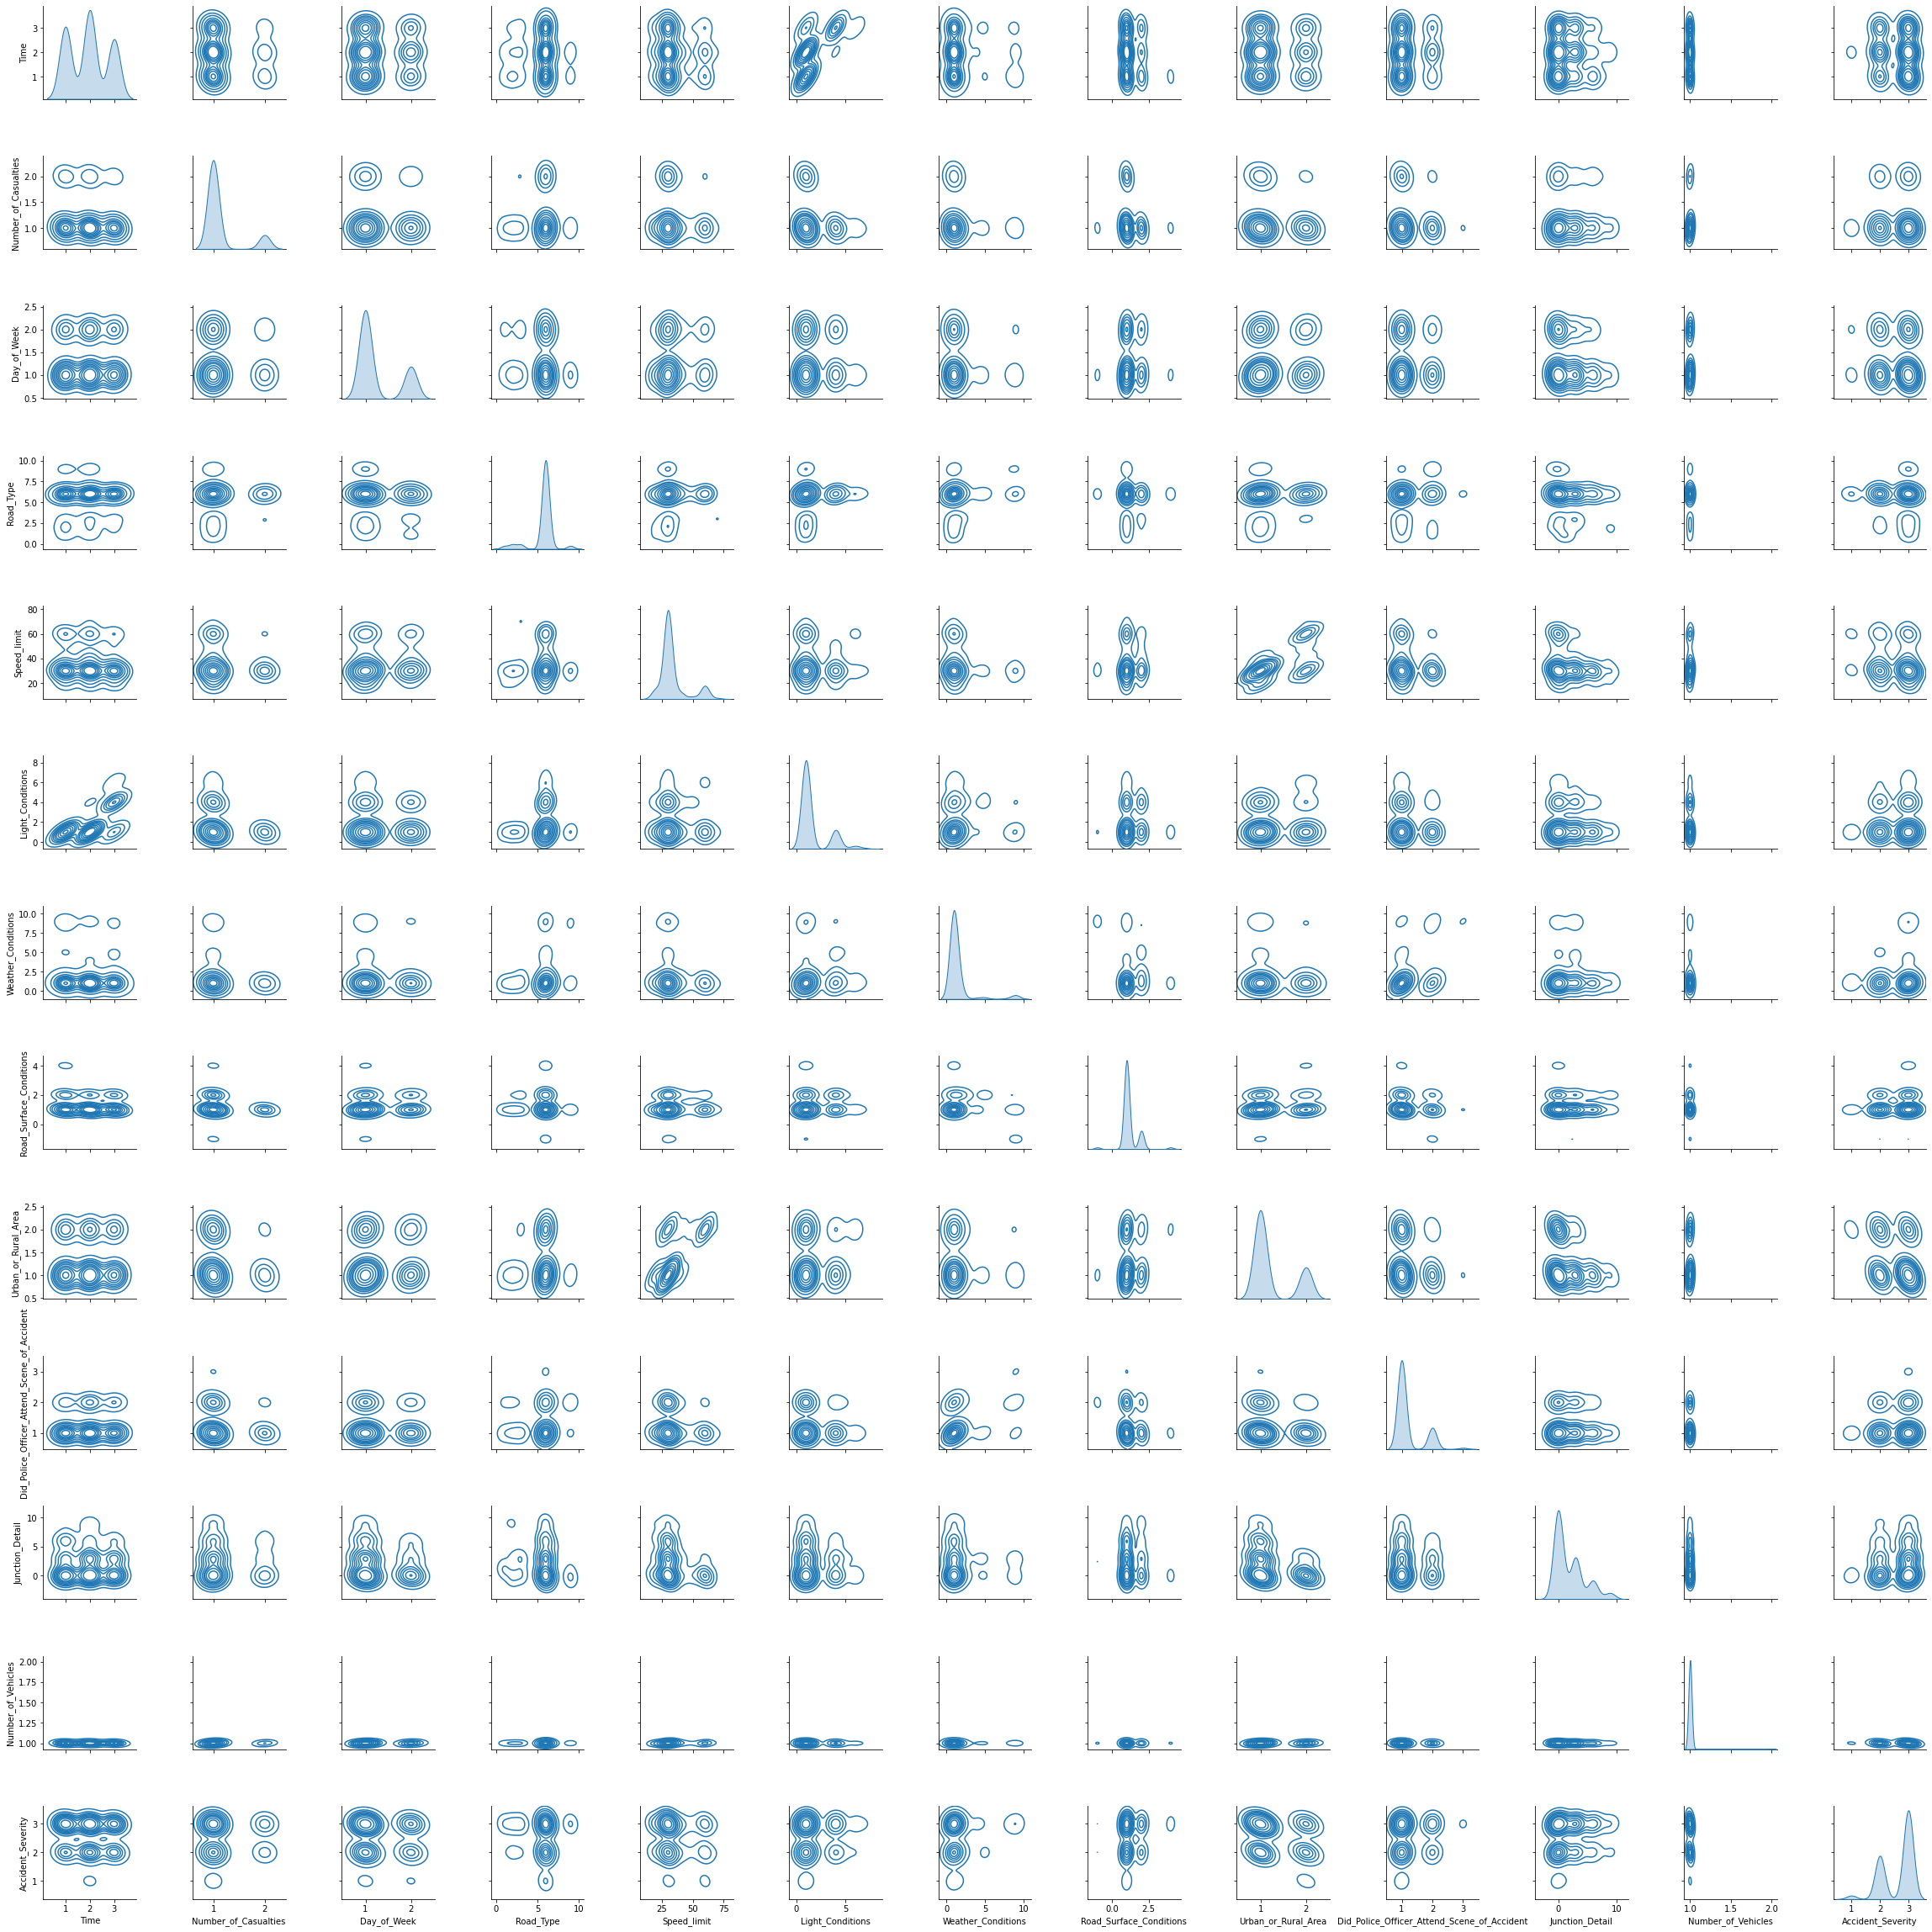

In [234]:
# Correlacion entre las variables
sns.pairplot(data = df_roads.sample(frac=0.05), kind = 'kde')

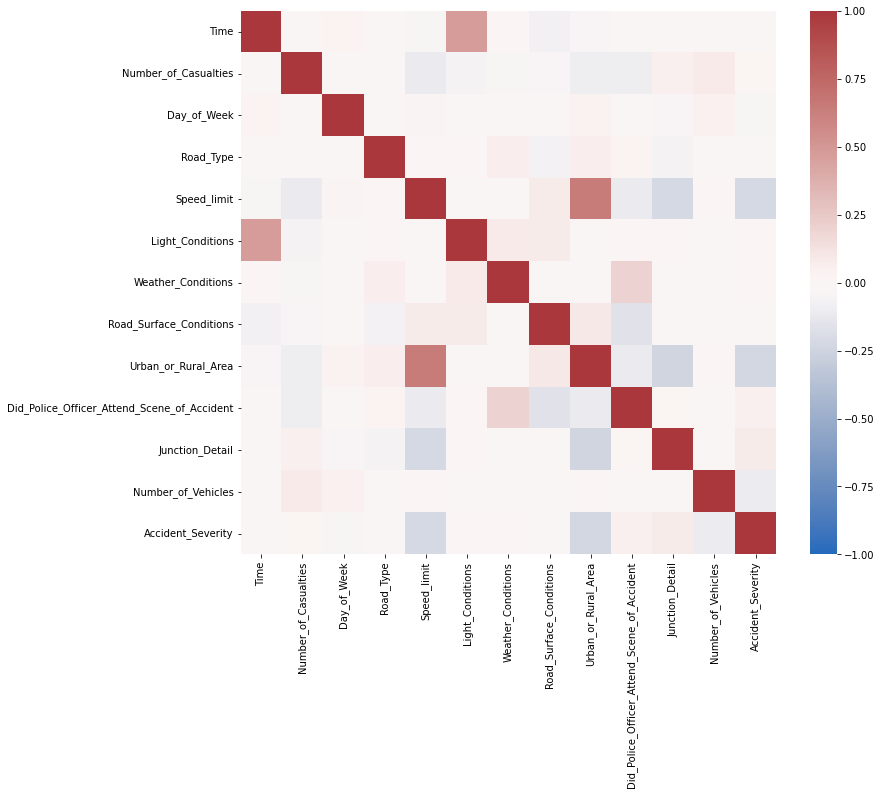

In [235]:
# Interacción entre las variables
fig = plt.figure(figsize = (12, 10))
sns.heatmap(df_roads.corr(), cmap = 'vlag', vmin = -1, vmax = 1)
plt.show()

## Análisis exploratorio

En el siguiente apartado hacemos un pre análisis de las posibles causas de accidentes, antes de hacer los clusters.

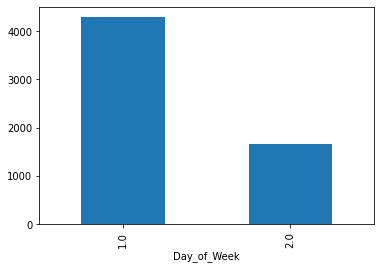

In [236]:
df_roads.groupby('Day_of_Week')['Number_of_Casualties'].sum().plot(kind='bar')

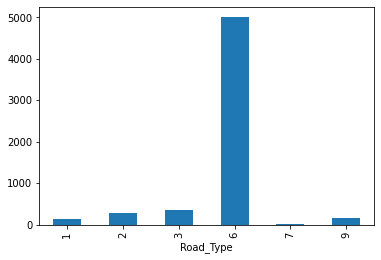

In [237]:
df_roads.groupby('Road_Type')['Number_of_Casualties'].sum().plot(kind='bar')

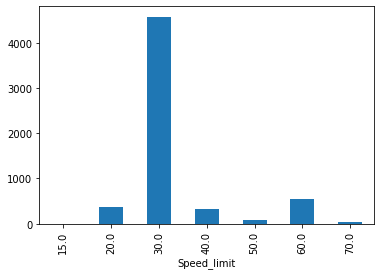

In [238]:
df_roads.groupby('Speed_limit')['Number_of_Casualties'].sum().plot(kind='bar')

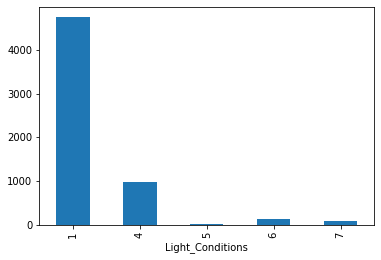

In [239]:
df_roads.groupby('Light_Conditions')['Number_of_Casualties'].sum().plot(kind='bar')

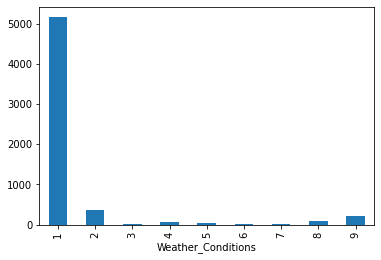

In [240]:
df_roads.groupby('Weather_Conditions')['Number_of_Casualties'].sum().plot(kind='bar')

In [241]:
df_roads['Number_of_Casualties'].groupby(df_roads['Number_of_Vehicles']).value_counts()

Number_of_Vehicles  Number_of_Casualties
1                   1                       4700
                    2                        601
                    3                          8
                    4                          2
2                   2                          6
Name: Number_of_Casualties, dtype: int64

In [242]:
df_roads['Day_of_Week'].groupby(df_roads['Urban_or_Rural_Area']).value_counts()

Urban_or_Rural_Area  Day_of_Week
1                    1.0            2942
                     2.0            1082
2                    1.0             888
                     2.0             405
Name: Day_of_Week, dtype: int64

In [243]:
df_roads['Did_Police_Officer_Attend_Scene_of_Accident'].groupby(df_roads['Weather_Conditions']).value_counts()

Weather_Conditions  Did_Police_Officer_Attend_Scene_of_Accident
1                   1                                              3592
                    2                                               981
                    3                                                27
2                   1                                               246
                    2                                                74
                    3                                                 1
3                   1                                                 9
                    2                                                 3
4                   1                                                46
                    2                                                13
5                   1                                                39
                    2                                                 7
6                   1                                                 1


In [244]:
df_roads.columns

Index(['Time', 'Number_of_Casualties', 'Day_of_Week', 'Road_Type',
       'Speed_limit', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Junction_Detail',
       'Number_of_Vehicles', 'Accident_Severity'],
      dtype='object')

In [245]:
features = ['Time', 'Day_of_Week', 'Road_Type','Speed_limit', 'Light_Conditions', 'Weather_Conditions','Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Junction_Detail']
scaler = StandardScaler()
X = scaler.fit_transform(df_roads[features])

In [246]:
X

array([[-1.24899022, -0.62309763,  0.28899641, ..., -0.32325547,
        -0.56685277,  0.44900098],
       [-1.24899022, -0.62309763,  0.28899641, ..., -0.32325547,
        -0.56685277, -0.77339443],
       [ 0.04932474,  1.60488494,  0.28899641, ..., -0.32325547,
        -0.56685277,  0.44900098],
       ...,
       [ 0.04932474, -0.62309763,  0.28899641, ...,  1.37176358,
        -0.56685277,  0.44900098],
       [ 1.34763969, -0.62309763,  0.28899641, ..., -0.32325547,
        -0.56685277,  1.67139639],
       [-1.24899022, -0.62309763, -1.83630636, ..., -0.32325547,
        -0.56685277, -0.77339443]])

In [247]:
X.shape

(5317, 9)

## 3.1. Clusterización inicial (KMeans)
Este algoritmo se usa debido a que encuentra clusters basado en centroides sobre los datos. Es un algoritmo bastante comun y utilizado en el mundo de la ciencia de datos.

Para poder saber que numero de clusters usar con el algoritmo, se corre el algoritmo con un numero incremental de clusters y a estos clusters se les saca el valor de la inercia. Con esto se puede hacer una grafica de codo para intentar obtener una idea de cual seria un buen numero de nodos a usar en el algoritmo.

In [248]:
n_clusters = range(2, 11)

In [249]:
kmeans_inertias = []

In [250]:
for n in n_clusters:
    kmeans_ = KMeans(n_clusters = n, random_state = 4)
    kmeans_.fit(X)
    kmeans_inertias.append(kmeans_.inertia_)
    if n == 5:
      df_roads['kmeans5_cluster'] = kmeans_.fit_predict(X)

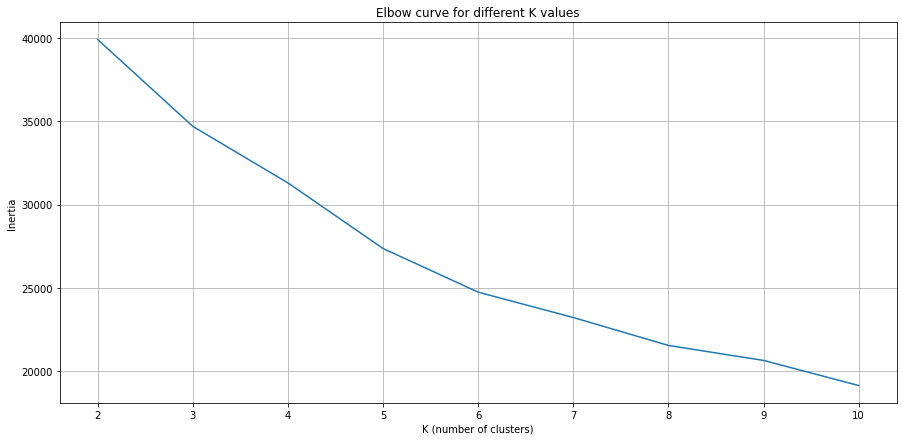

In [251]:
fig = plt.figure(figsize = (15, 7))
plt.plot(n_clusters, kmeans_inertias)
plt.title('Elbow curve for different K values')
plt.xlabel('K (number of clusters)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

En la grafica se puede ver que a medida que el numero de clusters se acerca a 10, la curva se empieza a aplanar. Por lo tanto se decidió dibujar la silueta de los clusters desde 2 hasta 10 para ver si los valores de las siluetas y el promedio de ellas incrementaban. De esta manera se podria ver si aumentar el numero de clusters hace que se definan mejor los clusters.

In [252]:
def plot_silhouette(X, n_clusters, random_state = 0):
    for n in n_clusters:
        kmeans_ = KMeans(n_clusters = n, random_state = random_state)
        preds_ = kmeans_.fit_predict(X)

        # Se calcula el coeficiente de silueta general
        silhouette_avg = silhouette_score(X, preds_)
        print('For n_clusters =', n, ', the average silhouette score is :', silhouette_avg )

        # Se calcula el coeficiente de silueta para cada instancia
        sample_silhouette_values = silhouette_samples(X, preds_)

        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n + 1) * 10])

        y_lower = 10
        for i in range(n):
            ith_cluster_silhouette_values = sample_silhouette_values[preds_ == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor = color, edgecolor = color, alpha = 0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title('The silhouette plot for the various clusters')
        ax1.set_xlabel('The silhouette coefficient values')
        ax1.set_ylabel('Cluster label')
        ax1.axvline(x=silhouette_avg, color = 'red', linestyle = '--')
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(preds_.astype(float) / n)
        ax2.scatter(X[:, 0], X[:, 1], marker = '.', s = 30, lw = 0, alpha = 0.7, c = colors, edgecolor = 'k')

        centers = kmeans_.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker = 'o', c = 'white', alpha = 1, s = 200, edgecolor = 'k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker = '$%d$' % i, alpha = 1, s = 50, edgecolor = 'k')

        ax2.set_title('The visualization of the clustered data')
        ax2.set_xlabel('Feature space for the 1st feature')
        ax2.set_ylabel('Feature space for the 2nd feature')

        plt.suptitle('Silhouette analysis for KMeans clustering on sample data with n_clusters = %d' % n, fontsize = 14, fontweight = 'bold')

    plt.show()

For n_clusters = 2 , the average silhouette score is : 0.250265133335722
For n_clusters = 3 , the average silhouette score is : 0.24892783520296966
For n_clusters = 4 , the average silhouette score is : 0.2608372194168418
For n_clusters = 5 , the average silhouette score is : 0.27710923094091083
For n_clusters = 6 , the average silhouette score is : 0.2628339857749262
For n_clusters = 7 , the average silhouette score is : 0.23426421069197165
For n_clusters = 8 , the average silhouette score is : 0.26501617825288504
For n_clusters = 9 , the average silhouette score is : 0.27922982161993487
For n_clusters = 10 , the average silhouette score is : 0.2616776184672383


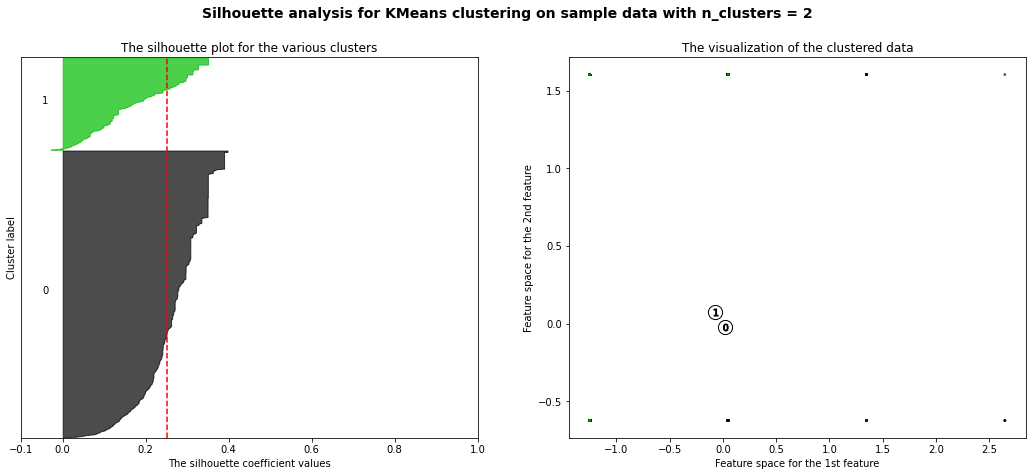

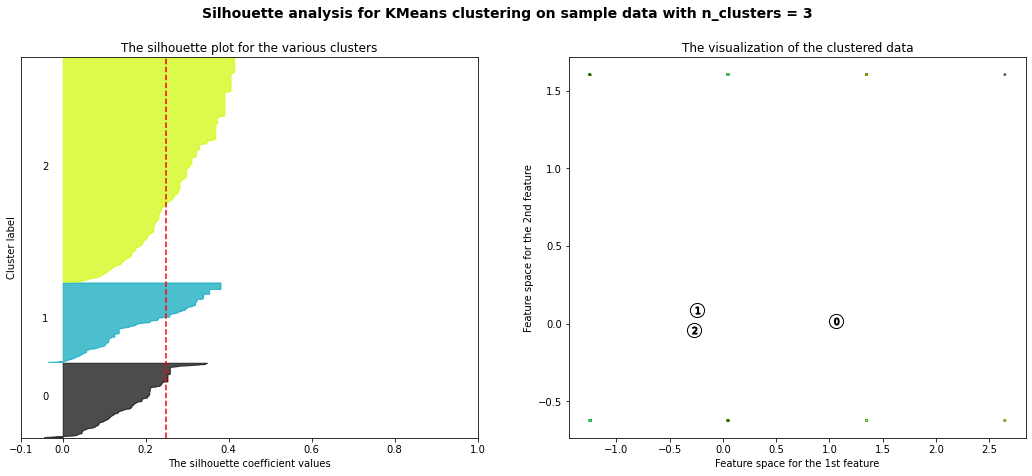

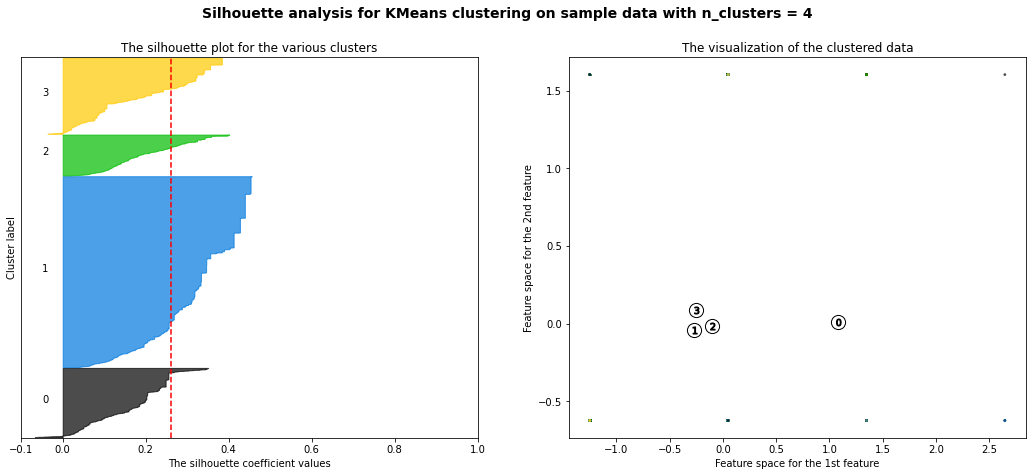

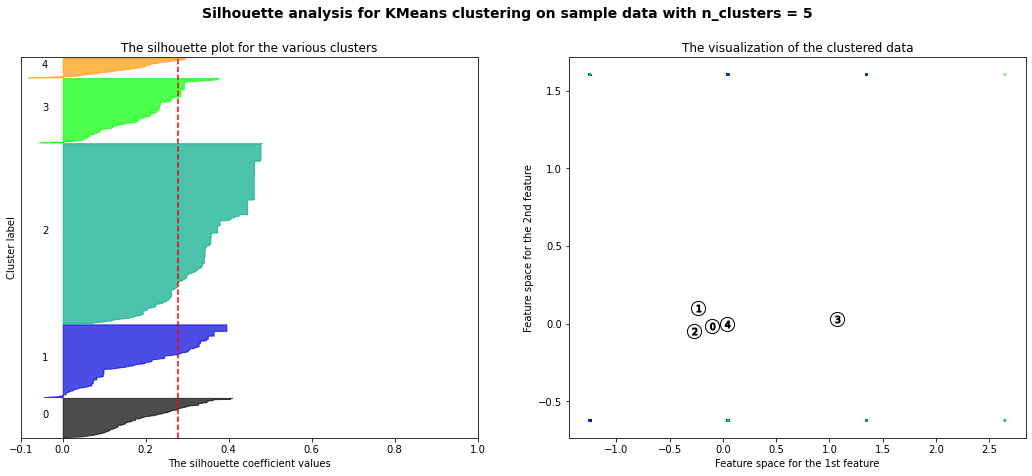

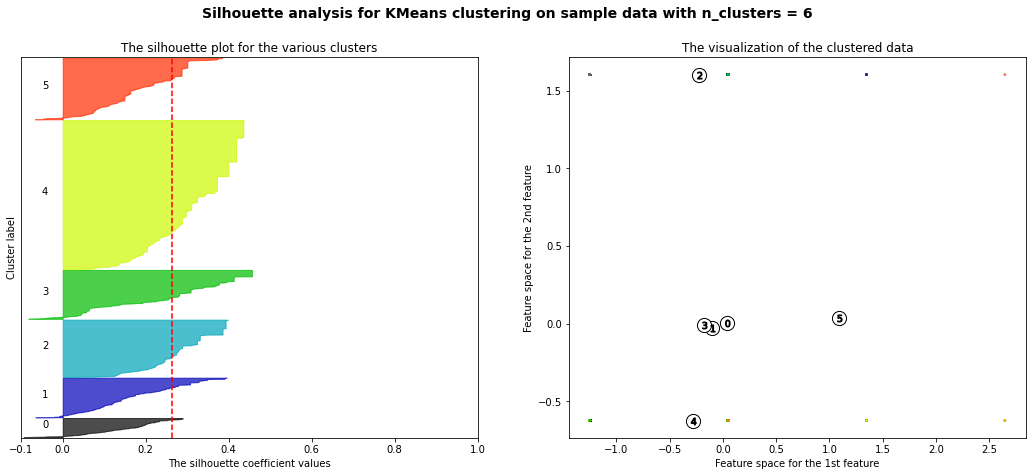

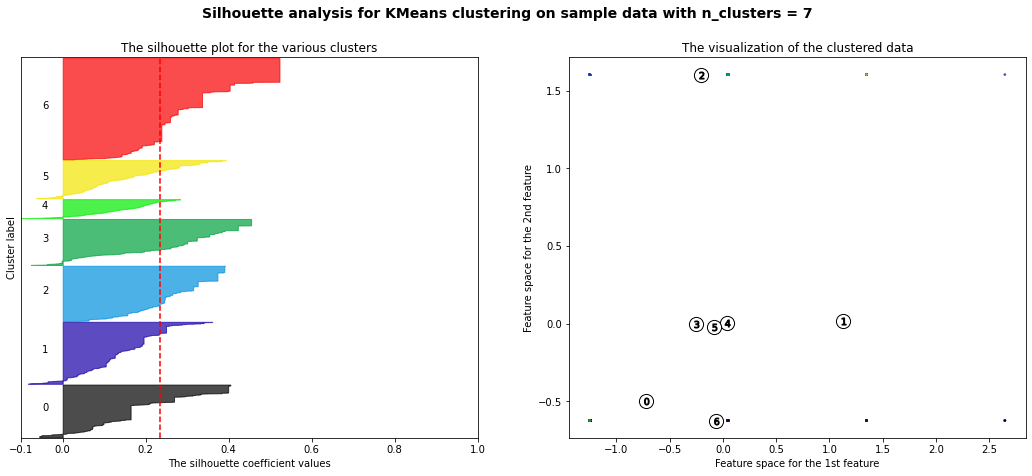

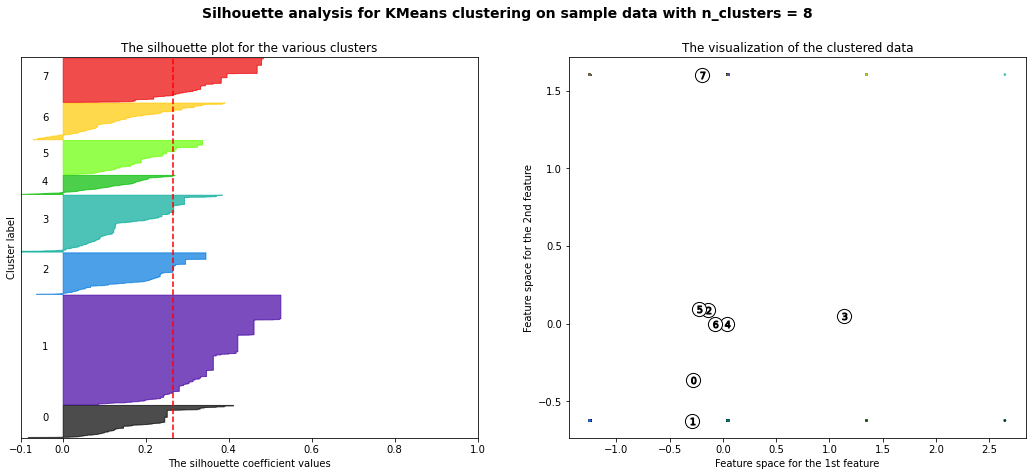

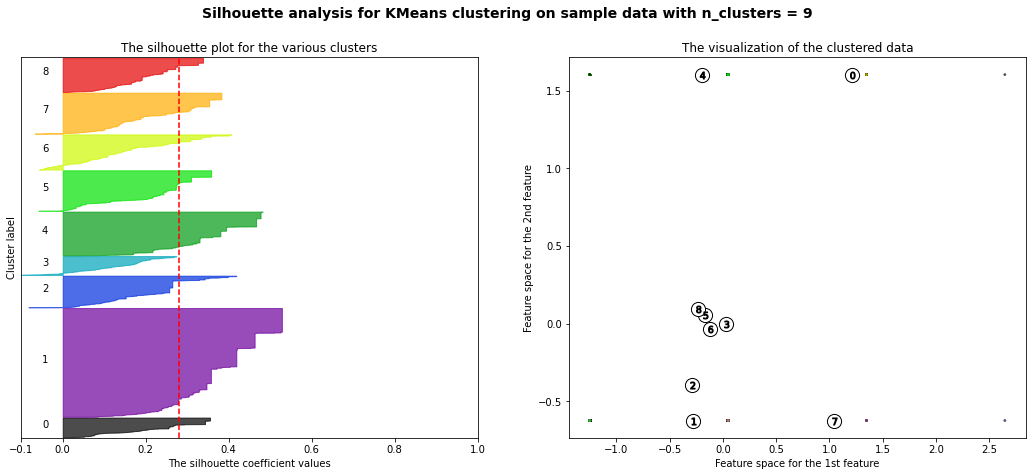

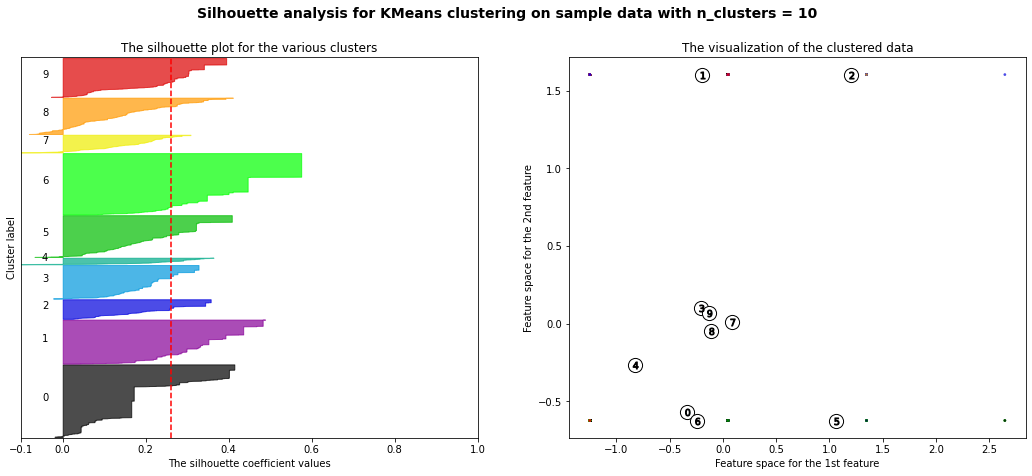

In [253]:
plot_silhouette(X, n_clusters, random_state = 4)

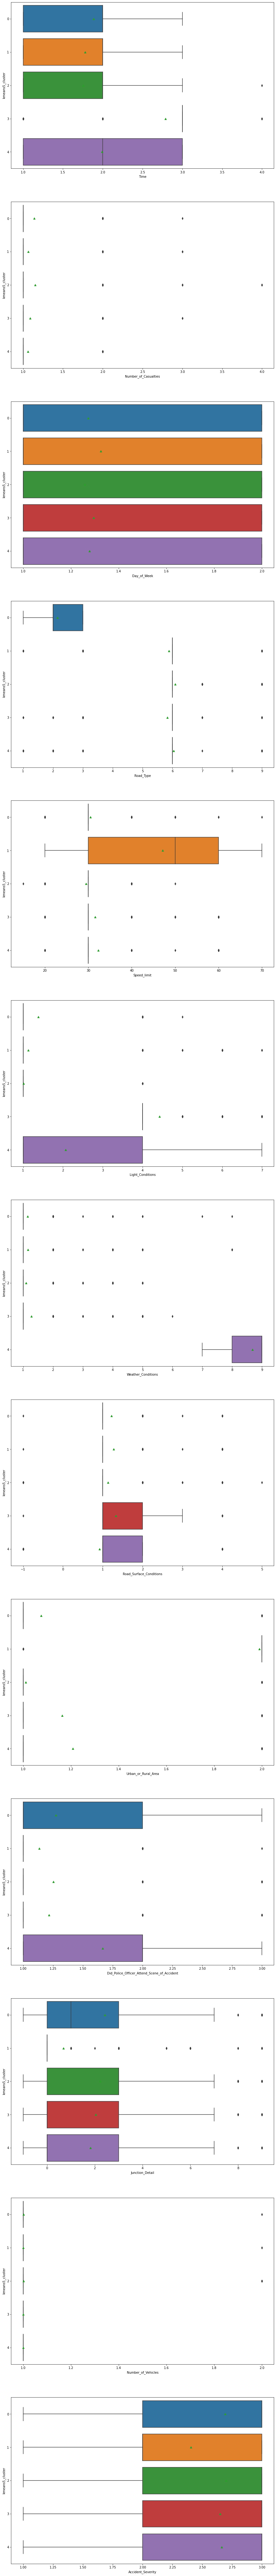

In [254]:
# Hacer un boxplot de los clusters comparados con cada uno de los atributos

fig, axes = plt.subplots(13, 1, figsize=(15, 150))
sns.boxplot(data=df_roads, x="Time", y="kmeans5_cluster", showmeans=True, orient='h', ax=axes[0])
sns.boxplot(data=df_roads, x="Number_of_Casualties", y="kmeans5_cluster", showmeans=True, orient='h', ax=axes[1])
sns.boxplot(data=df_roads, x="Day_of_Week", y="kmeans5_cluster", showmeans=True, orient='h', ax=axes[2])
sns.boxplot(data=df_roads, x="Road_Type", y="kmeans5_cluster", showmeans=True, orient='h', ax=axes[3])
sns.boxplot(data=df_roads, x="Speed_limit", y="kmeans5_cluster", showmeans=True, orient='h', ax=axes[4])
sns.boxplot(data=df_roads, x="Light_Conditions", y="kmeans5_cluster", showmeans=True, orient='h', ax=axes[5])
sns.boxplot(data=df_roads, x="Weather_Conditions", y="kmeans5_cluster", showmeans=True, orient='h', ax=axes[6])
sns.boxplot(data=df_roads, x="Road_Surface_Conditions", y="kmeans5_cluster", showmeans=True, orient='h', ax=axes[7])
sns.boxplot(data=df_roads, x="Urban_or_Rural_Area", y="kmeans5_cluster", showmeans=True, orient='h', ax=axes[8])
sns.boxplot(data=df_roads, x="Did_Police_Officer_Attend_Scene_of_Accident", y="kmeans5_cluster", showmeans=True, orient='h', ax=axes[9])
sns.boxplot(data=df_roads, x="Junction_Detail", y="kmeans5_cluster", showmeans=True, orient='h', ax=axes[10])
sns.boxplot(data=df_roads, x="Number_of_Vehicles", y="kmeans5_cluster", showmeans=True, orient='h', ax=axes[11])
sns.boxplot(data=df_roads, x="Accident_Severity", y="kmeans5_cluster", showmeans=True, orient='h', ax=axes[12])

In [255]:
df_roads

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity,kmeans5_cluster
0,1,1,1.0,6,30.0,1,1,1,1,1,3,1,3,2
1,1,1,1.0,6,30.0,1,1,1,1,1,0,1,3,2
2,2,1,2.0,6,30.0,1,1,1,1,1,3,1,3,2
3,2,2,1.0,6,30.0,1,1,1,1,1,6,1,2,2
4,1,2,1.0,6,30.0,1,1,1,1,1,6,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5333,2,1,1.0,6,20.0,1,1,2,1,1,9,1,3,2
5334,3,2,1.0,6,30.0,1,1,1,2,2,0,1,2,1
5335,2,1,1.0,6,30.0,4,5,2,1,2,3,1,2,3
5336,3,1,1.0,6,30.0,1,1,1,1,1,6,1,3,2


## 3.2. Cluterizacion con segundo algoritmo (Gaussian Mixture)
En este caso se usa Gaussian Clustering porque es capaz de producir las probabilidades de pertinencia por instancia a cada uno de los clusters. Esto es importante porque queremos saber los factores mas importantes a la hora de causar accidentes.

Para poder saber que numero de clusters usar con el algoritmo, se corre el algoritmo con un numero incremental de clusters y a estos clusters se les saca el valor del "score". Este valor es parecido al valor de la inercia del algoritmo de KMeans pero para Gaussian Mixture. Con esto se puede hacer una grafica de codo para intentar obtener una idea de cual seria un buen numero de nodos a usar en el algoritmo.

In [256]:
gaussian_clusters = range(2, 11)
gaussian_inertias = [-GaussianMixture(n_components=n, random_state=7).fit(X).score(X) for n in gaussian_clusters]

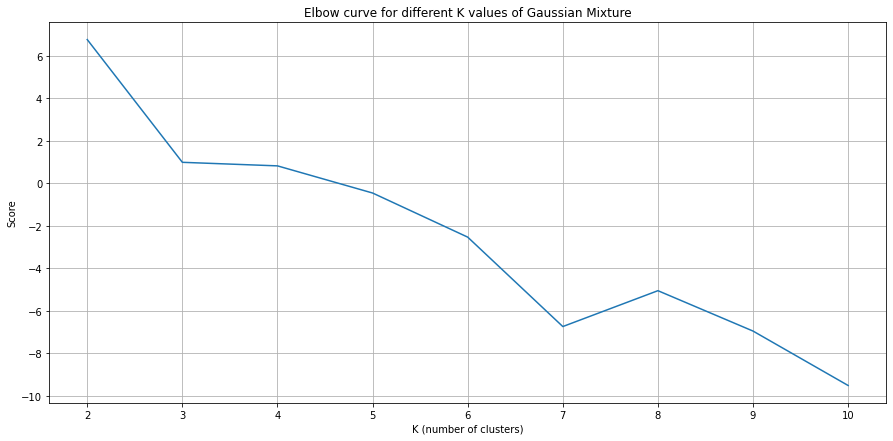

In [257]:
fig = plt.figure(figsize = (15, 7))
plt.plot(gaussian_clusters, gaussian_inertias)
plt.title('Elbow curve for different K values of Gaussian Mixture')
plt.xlabel('K (number of clusters)')
plt.ylabel('Score')
plt.grid(True)
plt.show()

Con base a la grafica de codo que se saco con los "scores" del algoritmo Gaussian Mixture, no se puede concluir contundentemente cual seria un valor optimo de clusters para representar. Sin embargo se puede ver que uno de los scores mas bajos alcanzados es cuando se tiene 7 clusters por lo cual se va a utilizar ese numero para este analisis.

In [258]:
gaussian = GaussianMixture(n_components=7, random_state=7)

In [259]:
df_roads["gaussian_cluster"] = gaussian.fit_predict(X)

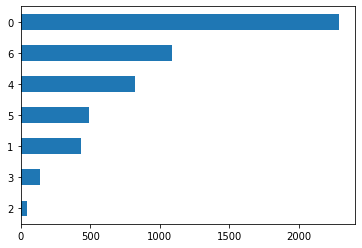

In [260]:
df_roads["gaussian_cluster"].value_counts().sort_values().plot.barh()

In [261]:
features

['Time',
 'Day_of_Week',
 'Road_Type',
 'Speed_limit',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Urban_or_Rural_Area',
 'Junction_Detail']

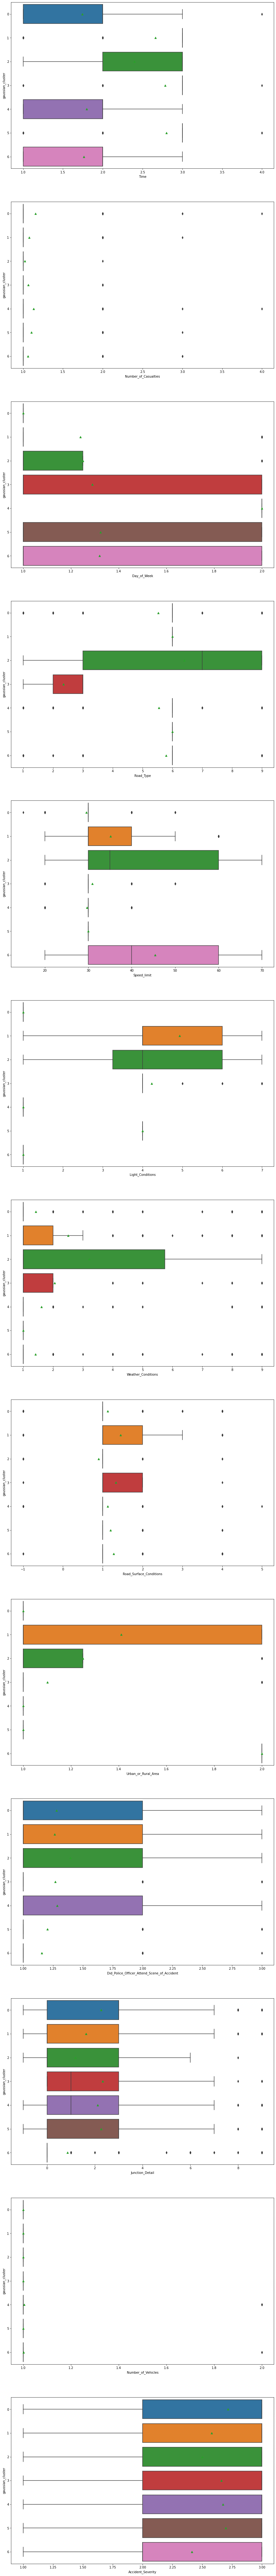

In [262]:
# Hacer un boxplot de los clusters comparados con cada uno de los atributos

fig, axes = plt.subplots(13, 1, figsize=(15, 150))
sns.boxplot(data=df_roads, x="Time", y="gaussian_cluster", showmeans=True, orient='h', ax=axes[0])
sns.boxplot(data=df_roads, x="Number_of_Casualties", y="gaussian_cluster", showmeans=True, orient='h', ax=axes[1])
sns.boxplot(data=df_roads, x="Day_of_Week", y="gaussian_cluster", showmeans=True, orient='h', ax=axes[2])
sns.boxplot(data=df_roads, x="Road_Type", y="gaussian_cluster", showmeans=True, orient='h', ax=axes[3])
sns.boxplot(data=df_roads, x="Speed_limit", y="gaussian_cluster", showmeans=True, orient='h', ax=axes[4])
sns.boxplot(data=df_roads, x="Light_Conditions", y="gaussian_cluster", showmeans=True, orient='h', ax=axes[5])
sns.boxplot(data=df_roads, x="Weather_Conditions", y="gaussian_cluster", showmeans=True, orient='h', ax=axes[6])
sns.boxplot(data=df_roads, x="Road_Surface_Conditions", y="gaussian_cluster", showmeans=True, orient='h', ax=axes[7])
sns.boxplot(data=df_roads, x="Urban_or_Rural_Area", y="gaussian_cluster", showmeans=True, orient='h', ax=axes[8])
sns.boxplot(data=df_roads, x="Did_Police_Officer_Attend_Scene_of_Accident", y="gaussian_cluster", showmeans=True, orient='h', ax=axes[9])
sns.boxplot(data=df_roads, x="Junction_Detail", y="gaussian_cluster", showmeans=True, orient='h', ax=axes[10])
sns.boxplot(data=df_roads, x="Number_of_Vehicles", y="gaussian_cluster", showmeans=True, orient='h', ax=axes[11])
sns.boxplot(data=df_roads, x="Accident_Severity", y="gaussian_cluster", showmeans=True, orient='h', ax=axes[12])

Los boxplots obtenidos permiten ver la relacion que tienen los clusters con cada uno de los atributos de los datos y como se distribuye cada uno de los clusters sobre estos datos.


## 3.3. Clusterización con Tercer Algoritmo (Agglomerative Clustering)

El algortimo Aglomerativo de Clusters funciona al considerar cada punto de datos como un único cluster. Despues de ello, comienza a calcular las distancias entre los puntos y juntarlos de acuerdo a sus similitudes para poder crear nuevos clusters.

El resultado es un dendograma que permite visualizar el proceso de fusión de los diferentes clusters hasta obtener los clusters definitivos generados por el algoritmo que agrupan a los diferentes grupos de datos.

In [263]:
agglomerative = AgglomerativeClustering(linkage = 'average', affinity = 'cosine', compute_distances = True, compute_full_tree = True)

In [264]:
df_roads['agglomerative_cluster'] = agglomerative.fit_predict(X)

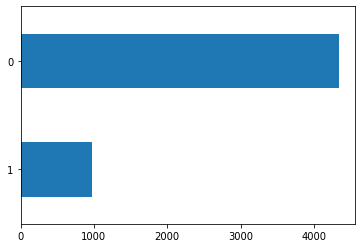

In [265]:
df_roads['agglomerative_cluster'].value_counts().sort_values().plot.barh()

In [266]:
features

['Time',
 'Day_of_Week',
 'Road_Type',
 'Speed_limit',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Urban_or_Rural_Area',
 'Junction_Detail']

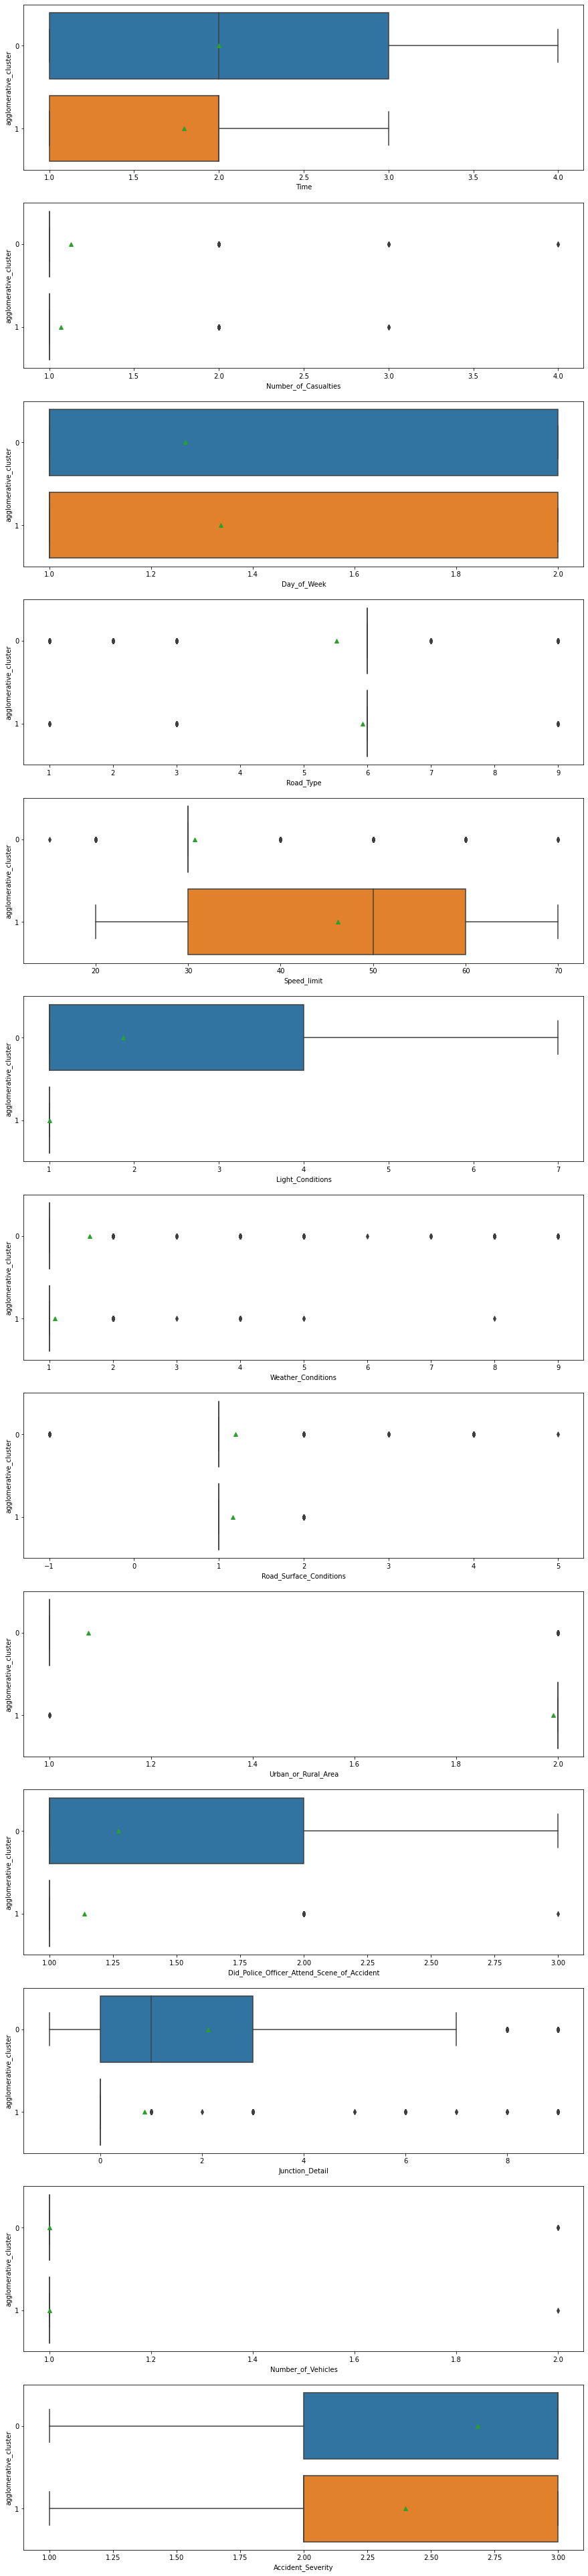

In [267]:
#Se hace un boxplot utilizando el algoritmo de clusters aglomerativos para observar los clusters comparados con cada uno de los atributos
fig, axes = plt.subplots(13, 1, figsize=(15, 70))
sns.boxplot(data=df_roads, x="Time", y="agglomerative_cluster", showmeans=True, orient='h', ax=axes[0])
sns.boxplot(data=df_roads, x="Number_of_Casualties", y="agglomerative_cluster", showmeans=True, orient='h', ax=axes[1])
sns.boxplot(data=df_roads, x="Day_of_Week", y="agglomerative_cluster", showmeans=True, orient='h', ax=axes[2])
sns.boxplot(data=df_roads, x="Road_Type", y="agglomerative_cluster", showmeans=True, orient='h', ax=axes[3])
sns.boxplot(data=df_roads, x="Speed_limit", y="agglomerative_cluster", showmeans=True, orient='h', ax=axes[4])
sns.boxplot(data=df_roads, x="Light_Conditions", y="agglomerative_cluster", showmeans=True, orient='h', ax=axes[5])
sns.boxplot(data=df_roads, x="Weather_Conditions", y="agglomerative_cluster", showmeans=True, orient='h', ax=axes[6])
sns.boxplot(data=df_roads, x="Road_Surface_Conditions", y="agglomerative_cluster", showmeans=True, orient='h', ax=axes[7])
sns.boxplot(data=df_roads, x="Urban_or_Rural_Area", y="agglomerative_cluster", showmeans=True, orient='h', ax=axes[8])
sns.boxplot(data=df_roads, x="Did_Police_Officer_Attend_Scene_of_Accident", y="agglomerative_cluster", showmeans=True, orient='h', ax=axes[9])
sns.boxplot(data=df_roads, x="Junction_Detail", y="agglomerative_cluster", showmeans=True, orient='h', ax=axes[10])
sns.boxplot(data=df_roads, x="Number_of_Vehicles", y="agglomerative_cluster", showmeans=True, orient='h', ax=axes[11])
sns.boxplot(data=df_roads, x="Accident_Severity", y="agglomerative_cluster", showmeans=True, orient='h', ax=axes[12])
plt.show()

In [268]:
#Se genera el algortimo que va juntando los datos de acuerdo a sus similitudes para crear los clusters.
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Se obtiene el dendograma que permite observar como se van generando los clusters de acuerdo al algoritmo
    dendrogram(linkage_matrix, **kwargs)

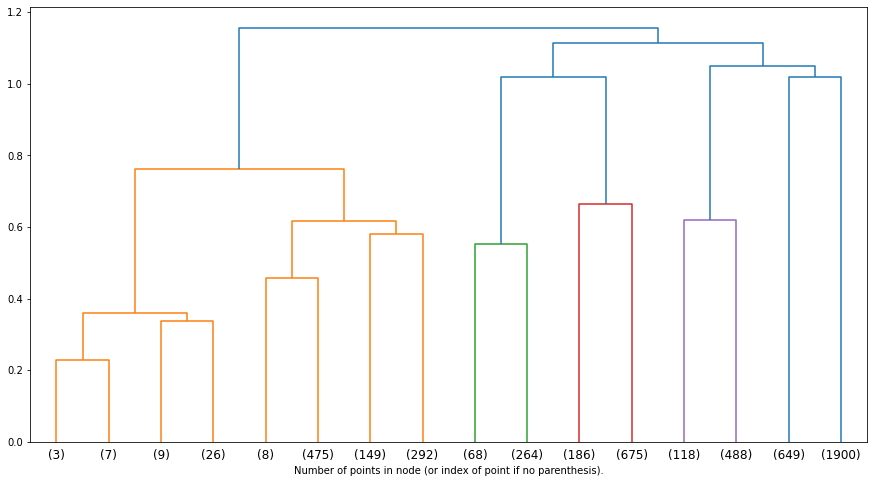

In [269]:
plt.figure(figsize = (15, 8))
plot_dendrogram(agglomerative, truncate_mode = 'level', p = 3)
plt.xlabel('Number of points in node (or index of point if no parenthesis).')
plt.show()

El dendograma obtenido permite observar una pequeña parte del proceso de fusión de los datos y como se fueron juntados hasta obtener los resultados que se pueden observar en la figura, lo que permite visualizar los datos cercanos entre ellos y como se agrupan dentro del mismo cluster.


In [270]:
df_roads

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity,kmeans5_cluster,gaussian_cluster,agglomerative_cluster
0,1,1,1.0,6,30.0,1,1,1,1,1,3,1,3,2,0,0
1,1,1,1.0,6,30.0,1,1,1,1,1,0,1,3,2,0,0
2,2,1,2.0,6,30.0,1,1,1,1,1,3,1,3,2,4,0
3,2,2,1.0,6,30.0,1,1,1,1,1,6,1,2,2,0,0
4,1,2,1.0,6,30.0,1,1,1,1,1,6,1,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5333,2,1,1.0,6,20.0,1,1,2,1,1,9,1,3,2,0,0
5334,3,2,1.0,6,30.0,1,1,1,2,2,0,1,2,1,6,1
5335,2,1,1.0,6,30.0,4,5,2,1,2,3,1,2,3,1,0
5336,3,1,1.0,6,30.0,1,1,1,1,1,6,1,3,2,0,0


In [271]:
df_roads.to_csv("lab1clustering.txt", index=True)